# All the import statements 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# loading and viewing the data set


In [3]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')


In [4]:
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Checking and dealing with null values

In [12]:
def null_table(training,testing):
    print("Training DataFrame")
    print(pd.isnull(training).sum())
    print('-'*30)
    print('Testing DataFrame')
    print(pd.isnull(testing).sum())

null_table(training,testing)
    

Training DataFrame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Testing DataFrame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Now we remove the cabin and the ticket columns from the training and the testing dataframe since we dont need it 

In [13]:
training.drop(['Cabin','Ticket'],axis=1,inplace=True)
testing.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [15]:
null_table(training,testing)

Training DataFrame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
------------------------------
Testing DataFrame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [17]:
training['Age'].fillna(training["Age"].median(),inplace=True)
testing['Age'].fillna(testing["Age"].median(),inplace=True)

training['Embarked'].fillna('S',inplace=True)
testing['Fare'].fillna(testing['Fare'].median(),inplace=True)

In [18]:
null_table(training,testing)

Training DataFrame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
------------------------------
Testing DataFrame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


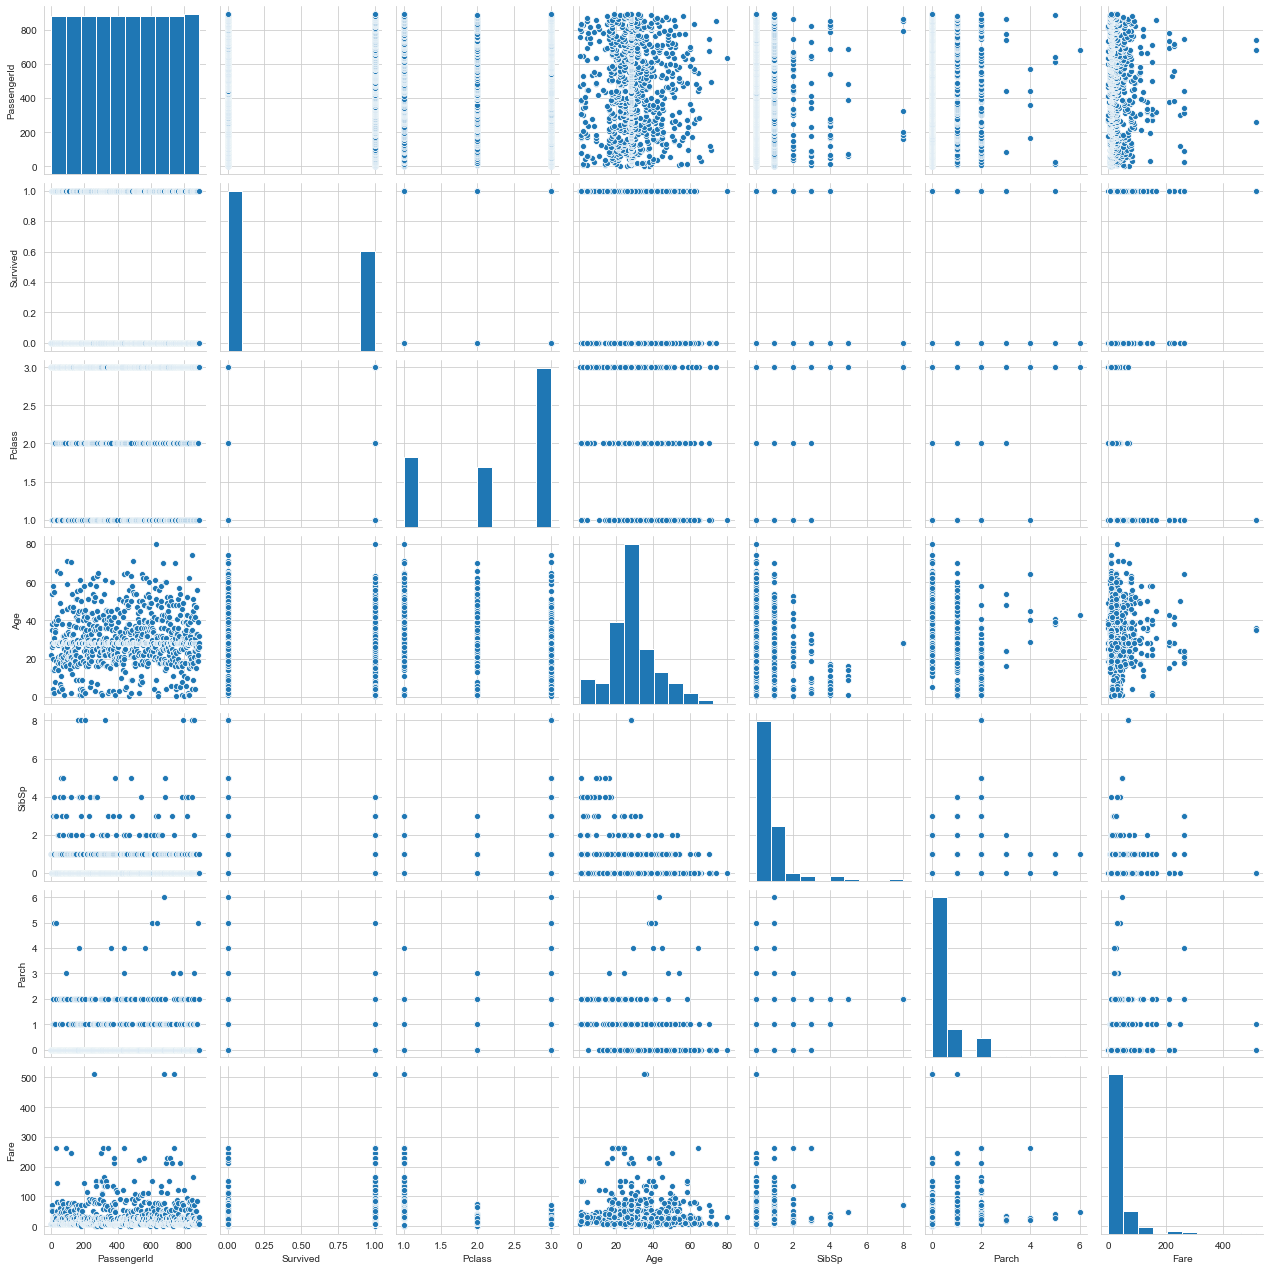

In [21]:
sns.pairplot(training)



In [22]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
760,761,0,3,"Garfirth, Mr. John",male,28.0,0,0,14.5000,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,46.9000,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,7.8542,S
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,9.2167,S


We must now perform one-hot encoding to change our catagorical value to numeric values. 
we do this because our model must only have int variables.
we change the sex and the embarked columns to numerical values.

In [76]:
training.loc[training['Sex']== 'male', 'Sex']=0
training.loc[training['Sex']== 'female', 'Sex']=1

testing.loc[testing['Sex']=='male','Sex']=0
testing.loc[testing['Sex']=='female','Sex']=0

training.loc[training['Embarked']=='S','Embarked']=0
training.loc[training['Embarked']=='C','Embarked']=1
training.loc[training['Embarked']=='Q','Embarked']=2

testing.loc[testing['Embarked']=='S','Embarked']=0
testing.loc[testing['Embarked']=='C','Embarked']=1
testing.loc[testing['Embarked']=='Q','Embarked']=2



In [77]:
training.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
309,310,1,1,"Francatelli, Miss. Laura Mabel",1,30.0,0,0,56.9292,1,1,0,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",1,31.0,1,0,18.0000,0,2,0,2
55,56,1,1,"Woolner, Mr. Hugh",0,28.0,0,0,35.5000,0,1,0,1
618,619,1,2,"Becker, Miss. Marion Louise",1,4.0,2,1,39.0000,0,4,0,0
177,178,0,1,"Isham, Miss. Ann Elizabeth",1,50.0,0,0,28.7125,1,1,0,0
363,364,0,3,"Asim, Mr. Adola",0,35.0,0,0,7.0500,0,1,0,1
332,333,0,1,"Graham, Mr. George Edward",0,38.0,0,1,153.4625,0,2,0,1
353,354,0,3,"Arnold-Franchi, Mr. Josef",0,25.0,1,0,17.8000,0,2,0,1
250,251,0,3,"Reed, Mr. James George",0,28.0,0,0,7.2500,0,1,0,1
666,667,0,2,"Butler, Mr. Reginald Fenton",0,25.0,0,0,13.0000,0,1,0,1


In [78]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",0,54.0,1,1,81.8583,0,3,0,2
326,1218,2,"Becker, Miss. Ruth Elizabeth",0,12.0,2,1,39.0000,0,4,0,0
240,1132,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",0,55.0,0,0,27.7208,1,1,0,2
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,7.6292,2,1,0,0
216,1108,3,"Mahon, Miss. Bridget Delia",0,27.0,0,0,7.8792,2,1,0,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,9.2250,0,1,0,1
378,1270,1,"Hipkins, Mr. William Edward",0,55.0,0,0,50.0000,0,1,0,1
198,1090,2,"Baimbrigge, Mr. Charles Robert",0,23.0,0,0,10.5000,0,1,0,1
13,905,2,"Howard, Mr. Benjamin",0,63.0,1,0,26.0000,0,2,0,1
203,1095,2,"Quick, Miss. Winifred Vera",0,8.0,1,1,26.0000,0,3,0,0


In [79]:
training["FamSize"]=training["SibSp"]+training['Parch']+1
testing["FamSize"]=testing["SibSp"]+testing['Parch']+1

In [80]:
training.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
428,429,0,3,"Flynn, Mr. James",0,28.00,0,0,7.7500,2,1,0,1
404,405,0,3,"Oreskovic, Miss. Marija",1,20.00,0,0,8.6625,0,1,0,0
803,804,1,3,"Thomas, Master. Assad Alexander",0,0.42,0,1,8.5167,1,2,0,3
332,333,0,1,"Graham, Mr. George Edward",0,38.00,0,1,153.4625,0,2,0,1
815,816,0,1,"Fry, Mr. Richard",0,28.00,0,0,0.0000,0,1,0,1
134,135,0,2,"Sobey, Mr. Samuel James Hayden",0,25.00,0,0,13.0000,0,1,0,1
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",1,23.00,0,0,7.5500,0,1,0,0
162,163,0,3,"Bengtsson, Mr. John Viktor",0,26.00,0,0,7.7750,0,1,0,1
790,791,0,3,"Keane, Mr. Andrew ""Andy""",0,28.00,0,0,7.7500,2,1,0,1
33,34,0,2,"Wheadon, Mr. Edward H",0,66.00,0,0,10.5000,0,1,0,1


In [81]:
training['IsAlone'] = training.FamSize.apply(lambda x: 1 if x==0 else 0)
testing['IsAlone'] = testing.FamSize.apply(lambda x: 1 if x==0 else 0)

In [82]:
training.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
524,525,0,3,"Kassem, Mr. Fared",0,28.0,0,0,7.2292,1,1,0,1
385,386,0,2,"Davies, Mr. Charles Henry",0,18.0,0,0,73.5000,0,1,0,1
864,865,0,2,"Gill, Mr. John William",0,24.0,0,0,13.0000,0,1,0,1
358,359,1,3,"McGovern, Miss. Mary",1,28.0,0,0,7.8792,2,1,0,0
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,18.0,1,0,227.5250,1,2,0,2
616,617,0,3,"Danbom, Mr. Ernst Gilbert",0,34.0,1,1,14.4000,0,3,0,1
145,146,0,2,"Nicholls, Mr. Joseph Charles",0,19.0,1,1,36.7500,0,3,0,1
708,709,1,1,"Cleaver, Miss. Alice",1,22.0,0,0,151.5500,0,1,0,0
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",0,9.0,4,2,31.3875,0,7,0,3
424,425,0,3,"Rosblom, Mr. Viktor Richard",0,18.0,1,1,20.2125,0,3,0,1


In [83]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
297,1189,3,"Samaan, Mr. Hanna",0,27.0,2,0,21.6792,1,3,0,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,29.0000,0,3,0,1
142,1034,1,"Ryerson, Mr. Arthur Larned",0,61.0,1,3,262.3750,1,5,0,1
291,1183,3,"Daly, Miss. Margaret Marcella Maggie""""",0,30.0,0,0,6.9500,2,1,0,0
105,997,3,"Holthen, Mr. Johan Martin",0,28.0,0,0,22.5250,0,1,0,1
88,980,3,"O'Donoghue, Ms. Bridget",0,27.0,0,0,7.7500,2,1,0,4
268,1160,3,"Howard, Miss. May Elizabeth",0,27.0,0,0,8.0500,0,1,0,0
86,978,3,"Barry, Miss. Julia",0,27.0,0,0,7.8792,2,1,0,0
136,1028,3,"Zakarian, Mr. Mapriededer",0,26.5,0,0,7.2250,1,1,0,1
299,1191,3,"Johansson, Mr. Nils",0,29.0,0,0,7.8542,0,1,0,1


In [84]:
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme":
                      "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}
training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

In [85]:
print(set(testing["Title"]))

{0, 1, 2, 3, 4}


# Importing all the sklearn models and the maker and accuracy function from sklearn

In [86]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import make_scorer, accuracy_score 

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [89]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

svc model


In [91]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7206703910614525


LinearSVC Model

In [92]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.7932960893854749


RandomForest Model

In [93]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8324022346368715


In [94]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8156424581005587


In [95]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


In [96]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


In [97]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


In [103]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.832402
3,Logistic Regression,0.815642
1,Linear SVC,0.793296
5,Gaussian Naive Bayes,0.787709
6,Decision Tree,0.776536
4,K Nearest Neighbors,0.743017
0,SVC,0.720670


In [104]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=5)

In [105]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=5)

In [110]:
submission_predictions =rf_clf.predict(X_test)


In [107]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanicSubmissions.csv", index=False)
print(submission.shape)

(418, 2)
